# Rescale optical depth and compute 1D power spectrum

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import extract_skewers
import read_gadget
import read_genic
import fake_spectra.griddedspectra as grid_spec
import snapshot_admin
import measure_flux_power as powF

### Read skewers for a single snapshot, looking at different temperatures 

In [2]:
basedir='/Users/font/CosmoData/test_sim_emulator/test_march_2019/'
skewers_dir=basedir+'/output/skewers/'
test_snap_num=8
n_skewers=10
width_Mpc=0.1
# read file containing information of all temperature rescalings
snap_filename=skewers_dir+'/'+extract_skewers.get_snapshot_json_filename(test_snap_num,n_skewers,width_Mpc)

In [3]:
# loop over all temperature models in snapshot, rescale with different values of scale_tau
scales_tau=[0.8,0.9,1.0,1.1,1.2]
print('scales_tau',scales_tau)
# create an object that will deal with all skewers in the snapshot
snapshot=snapshot_admin.SnapshotAdmin(snap_filename,scales_tau)
Nsk=len(snapshot.data['sk_files'])

scales_tau [0.8, 0.9, 1.0, 1.1, 1.2]


In [4]:
# loop over all temperature models in snapshot
for isk in range(Nsk):
    sk_file=snapshot.data['sk_files'][isk]
    print(isk,sk_file,basedir,skewers_dir,test_snap_num)
    # read skewers from HDF5 file
    skewers=grid_spec.GriddedSpectra(test_snap_num, basedir+'/output/', 
                                         savedir=skewers_dir, savefile=sk_file, reload_file=False)
    # compute fiducial mean flux (and compare to stored values)
    mf_ini=skewers.get_mean_flux()
    print(mf_ini,snapshot.data['sim_mf'][isk])

0 skewers_8_Ns10_wM0.1_sT0.8_sg1.0.hdf5 /Users/font/CosmoData/test_sim_emulator/test_march_2019/ /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/ 8
100  sightlines. resolution:  8.06712167091  z= 3.500000045
0.458512674903 0.4585126749034992
1 skewers_8_Ns10_wM0.1_sT1.0_sg1.0.hdf5 /Users/font/CosmoData/test_sim_emulator/test_march_2019/ /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/ 8
100  sightlines. resolution:  8.06712167091  z= 3.500000045
0.455109683771 0.45510968377146144
2 skewers_8_Ns10_wM0.1_sT1.2_sg1.0.hdf5 /Users/font/CosmoData/test_sim_emulator/test_march_2019/ /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/ 8
100  sightlines. resolution:  8.06712167091  z= 3.500000045
0.452127613689 0.4521276136893732


### Rescale skewers to different optical depths, and compute 1D power spectra

In [5]:
arxiv_p1d=snapshot.get_all_flux_power()

successfully read healthy configuration file
in L_Mpc, 30000.0 0.6724 44.6162998215348
100  sightlines. resolution:  8.06712167091  z= 3.500000045
100  sightlines. resolution:  8.06712167091  z= 3.500000045
100  sightlines. resolution:  8.06712167091  z= 3.500000045


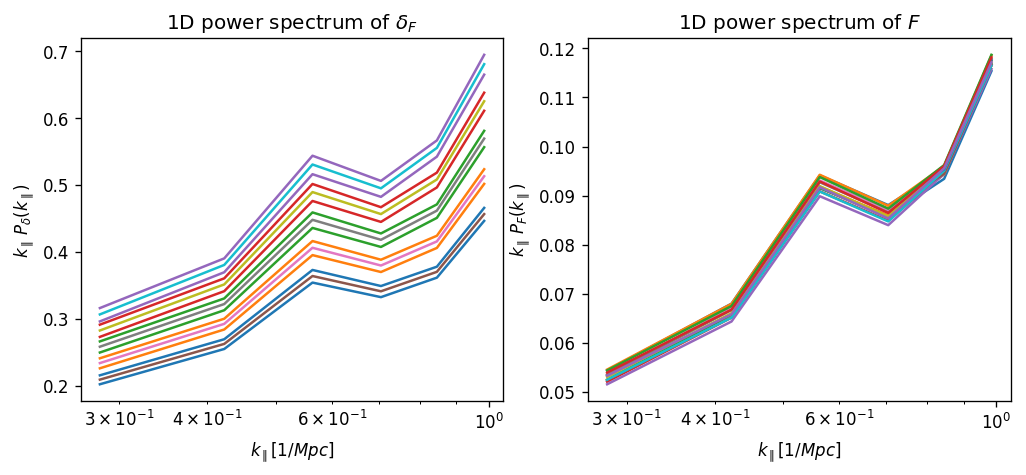

In [6]:
# number of measured powers
Npow=len(arxiv_p1d)
# they all share the same wavenumber grid
k_Mpc=np.array(arxiv_p1d[0]['k_Mpc'])
kmin_Mpc=k_Mpc[1]
kmax_Mpc=1.0
mask=(k_Mpc>kmin_Mpc) & (k_Mpc<kmax_Mpc)
# make two plots, or delta_F and F
plt.figure(figsize=[10,4])

plt.subplot(1, 2, 1)
for isk in range(Npow):
    p1d_Mpc=np.array(arxiv_p1d[isk]['p1d_Mpc'])
    mF=arxiv_p1d[isk]['mF']
    plt.semilogx(k_Mpc[mask],k_Mpc[mask]*p1d_Mpc[mask],label=r'$<F> =$ %.2e'% mF)
plt.title(r'1D power spectrum of $\delta_F$')
plt.xlabel(r'$k_\parallel [1/Mpc]$')
plt.ylabel(r'$k_\parallel \, P_\delta(k_\parallel)$')

plt.subplot(1, 2, 2)
for isk in range(Npow):
    p1d_Mpc=np.array(arxiv_p1d[isk]['p1d_Mpc'])
    mF=arxiv_p1d[isk]['mF']
    plt.semilogx(k_Mpc[mask],k_Mpc[mask]*p1d_Mpc[mask]*mF**2,label=r'$<F> =$ %.2e'% mF)
plt.title(r'1D power spectrum of $F$')
plt.xlabel(r'$k_\parallel [1/Mpc]$')   
plt.ylabel(r'$k_\parallel \, P_F(k_\parallel)$')

In [7]:
snapshot.write_p1d_json(filename='test_p1d.json')